# Data Analysis of proteins  
Author: Amish Mishra  
Date: March 30, 2022  
Use `cder2` kernel  

In [9]:
import pandas
import matplotlib.pyplot as plt
from IPython.display import display

In [10]:
def stability_threshold_labeller(label_col_value, thresh=1.0):
    '''
    Takes a stability score and returns a lable for it depending on a threshold
    '''
    if label_col_value > thresh:
        return "green"
    else:
        return "red"

In [11]:
# Load in the dataframe
df = pandas.read_csv('main_df.csv')

# Label stable: green and unstable: red
stability_threshold = 1.0  # set the stability score at which to separate the stable label from the unstable label
df['label'] = df['stabilityscore_cnn_calibrated'].apply(stability_threshold_labeller, thresh = stability_threshold)

# Get counts of stable and unstable designs
stable_df = df.groupby('topology')['label'].apply(lambda x: (x=='green').sum()).reset_index(name='stable')
unstable_df = df.groupby('topology')['label'].apply(lambda x: (x=='red').sum()).reset_index(name='unstable')
summary_df = stable_df.merge(unstable_df, on='topology')
summary_df

,topology,stable,unstable
0,EEHEE,579,4669
1,EHEE,679,2788
2,HEEH,118,4872
3,HHH,1346,1123


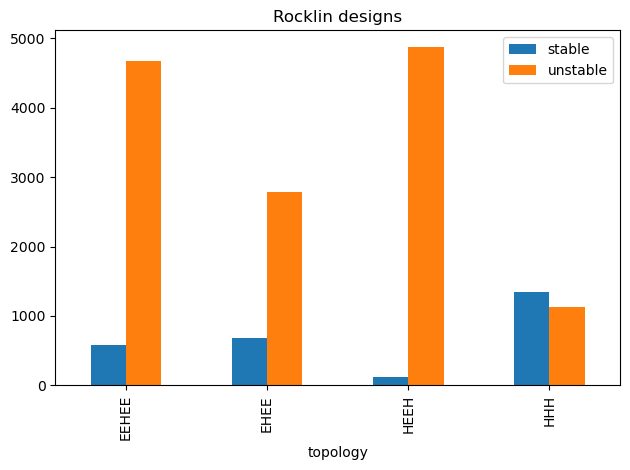

In [5]:
summary_df.plot.bar(x='topology', title='Rocklin designs')
plt.tight_layout()

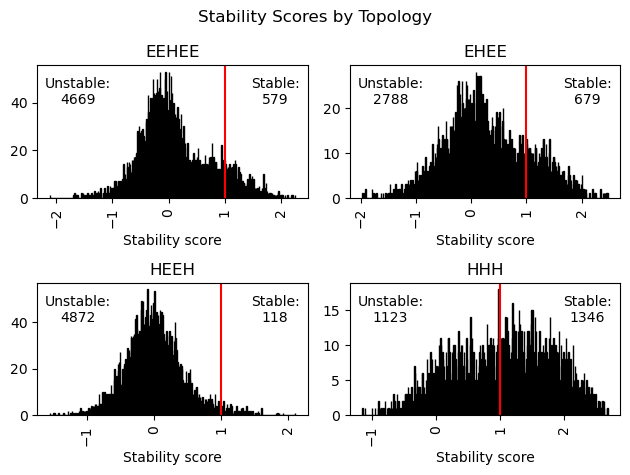

In [7]:
data = df['stabilityscore_cnn_calibrated']
axes = df['stabilityscore_cnn_calibrated'].hist(by = df['topology'], 
                                                bins=int((max(data) - min(data)) / .01),
                                                edgecolor='black')
for row in axes:
    for ax in row:
        top = ax.title.get_text()  # get the topology name for this subplot
        ax.text(0.15, 0.8, 'Unstable:\n'+str(summary_df[summary_df['topology'] == top]['unstable'].values[0]),
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)  # mark how many are unstable
        ax.text(0.88, 0.8, 'Stable:\n'+str(summary_df[summary_df['topology'] == top]['stable'].values[0]),
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)  # mark how many are stable
        ax.axvline(x=1, ymin=0, ymax=2000, color='red')  # add red line
        ax.set_xlabel('Stability score')
plt.suptitle('Stability Scores by Topology')
plt.tight_layout()
plt.savefig('figures/stability_scores_distribution.svg')
plt.savefig('figures/stability_scores_distribution.eps', format='eps')